# Sales Prediction Task 

### Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Reading the dataset

In [9]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

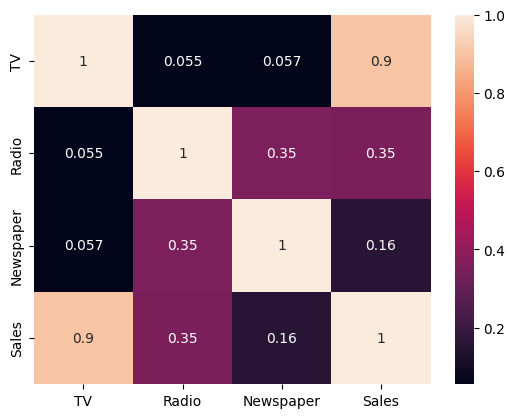

In [17]:
sns.heatmap(df.corr(), annot=True)
plt.show()

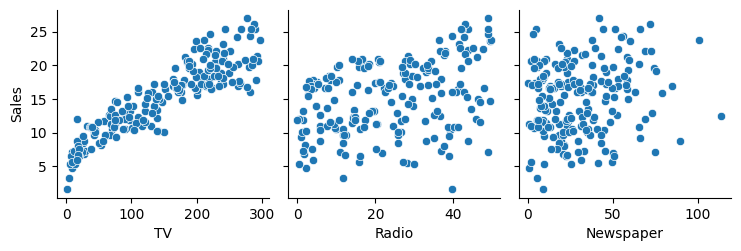

In [16]:
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="scatter")
plt.show()

### Splitting the dataset

In [18]:
X = df[["TV", "Radio", "Newspaper"]]
Y = df["Sales"]

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
xtrain.head()

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [21]:
xtest.head()

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [22]:
ytrain.head()

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64

In [23]:
ytest.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

### Model Building

In [24]:
lin_model = LinearRegression()
lin_model.fit(xtrain, ytrain)

LinearRegression()

### Model Evaluation

In [26]:
## Test Evaluation

ypredtest = lin_model.predict(xtest)

mse = mean_squared_error(ytest, ypredtest)
print("mean_squared_error : ", mse)

mae = mean_absolute_error(ytest, ypredtest)
print("mean_absolute_error : ", mae)

r_squared = r2_score(ytest, ypredtest)
print("r_squared : ", r_squared)

adjusted_r2 = (1 - (1 - r_squared)*(len(xtest) - 1) / (len(xtest) - len(X.columns) - 1))
print("adjusted_r2 : ", adjusted_r2)

mean_squared_error :  2.9077569102710896
mean_absolute_error :  1.2748262109549338
r_squared :  0.9059011844150826
adjusted_r2 :  0.8980596164496728


In [27]:
## Train Evaluation

ypredtrain = lin_model.predict(xtrain)

mse = mean_squared_error(ytrain, ypredtrain)
print("mean_squared_error : ", mse)

mae = mean_absolute_error(ytrain, ypredtrain)
print("mean_absolute_error : ", mae)

r_squared = r2_score(ytrain, ypredtrain)
print("r_squared : ", r_squared)

adjusted_r2 = (1 - (1 - r_squared)*(len(xtrain) - 1) / (len(xtrain) - len(X.columns) - 1))
print("adjusted_r2 : ", adjusted_r2)

mean_squared_error :  2.676142653782669
mean_absolute_error :  1.2344160869575869
r_squared :  0.9001416005862131
adjusted_r2 :  0.8982212467513325


### Best fit line

In [34]:
m = lin_model.coef_[0]
m

0.05450927083721978

In [36]:
c = lin_model.intercept_
c

4.714126402214127

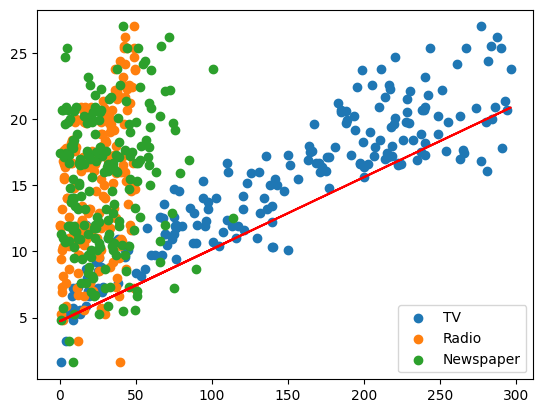

In [39]:
plt.scatter(df["TV"], df["Sales"], label='TV')
plt.scatter(df["Radio"], df["Sales"], label="Radio")
plt.scatter(df["Newspaper"], df["Sales"], label="Newspaper")
plt.plot(X, X*m + c, color="r")
plt.legend()